In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import numpy as np
x_train = np.loadtxt("/content/drive/My Drive/NLP/x_train.txt")
y_train = np.loadtxt("/content/drive/My Drive/NLP/y_train.txt")
x_val = np.loadtxt("/content/drive/My Drive/NLP/x_val.txt")
y_val = np.loadtxt("/content/drive/My Drive/NLP/y_val.txt")
x_test = np.loadtxt("/content/drive/My Drive/NLP/x_test.txt")
y_test = np.loadtxt("/content/drive/My Drive/NLP/y_test.txt")

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(11403, 389)
(11403,)
(3801, 389)
(3801,)
(3801, 389)
(3801,)


In [3]:
from sklearn import tree
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=0)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

y_1 = regr_1.predict(x_train)
y_2 = regr_2.predict(x_train)

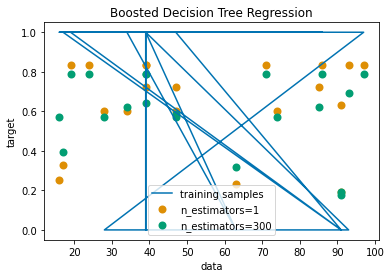

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(x_train[:20,0], y_train[:20,], color=colors[0], label="training samples")
plt.scatter(x_train[:20,0], y_1[:20,], color=colors[1], label="n_estimators=1", linewidth=2)
plt.scatter(x_train[:20,0], y_2[:20,], color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
estimator = sklearn.tree.DecisionTreeClassifier()
auroc=[]
n_est=[]
i=[1,100,200,300,400,500,600,700,800,900,1000]
for n_est in i:
  model = sklearn.ensemble.AdaBoostClassifier(base_estimator=estimator, n_estimators=n_est)
  model.fit(x_train, y_train).score(x_test, y_test)
  predictions1 = model.predict(x_test)
  auroc.append(sklearn.metrics.roc_auc_score(y_test,predictions1))
  #max_depth=None, Splitter=best,learning_rate=1

In [ ]:
auroc1=[]
n_est=[]
i=[1,100,200,300,400,500,600,700,800,900,1000]
for n_est in i:
  model = sklearn.ensemble.AdaBoostClassifier(base_estimator=estimator, n_estimators=n_est,learning_rate=2.0)
  model.fit(x_train, y_train).score(x_test, y_test)
  predictions1 = model.predict(x_test)
  auroc1.append(sklearn.metrics.roc_auc_score(y_test,predictions1))
  #max_depth=None, Splitter=best,learning_rate=2

In [ ]:
auroc2=[]
n_est=[]
i=[1,100,200,300,400,500,600,700,800,900,1000]
for n_est in i:
  model = sklearn.ensemble.AdaBoostClassifier(base_estimator=estimator, n_estimators=n_est,learning_rate=0.5)
  model.fit(x_train, y_train).score(x_test, y_test)
  predictions1 = model.predict(x_test)
  auroc2.append(sklearn.metrics.roc_auc_score(y_test,predictions1))
  #max_depth=None, Splitter=best,learning_rate=0.5

In [ ]:
auroc3=[]
n_est=[]
i=[1,100,200,300,400,500,600,700,800,900,1000]
for n_est in i:
  model = sklearn.ensemble.AdaBoostClassifier(base_estimator=estimator, n_estimators=n_est,learning_rate=0.3)
  model.fit(x_train, y_train).score(x_test, y_test)
  predictions1 = model.predict(x_test)
  auroc3.append(sklearn.metrics.roc_auc_score(y_test,predictions1))
  #max_depth=None, Splitter=best,learning_rate=0.5

In [ ]:
auroc4=[]
n_est=[]
i=[1,100,200,300,400,500,600,700,800,900,1000]
for n_est in i:
  model = sklearn.ensemble.AdaBoostClassifier(base_estimator=estimator, n_estimators=n_est,learning_rate=3)
  model.fit(x_train, y_train).score(x_test, y_test)
  predictions1 = model.predict(x_test)
  auroc4.append(sklearn.metrics.roc_auc_score(y_test,predictions1))
  #max_depth=None, Splitter=best,learning_rate=0.5

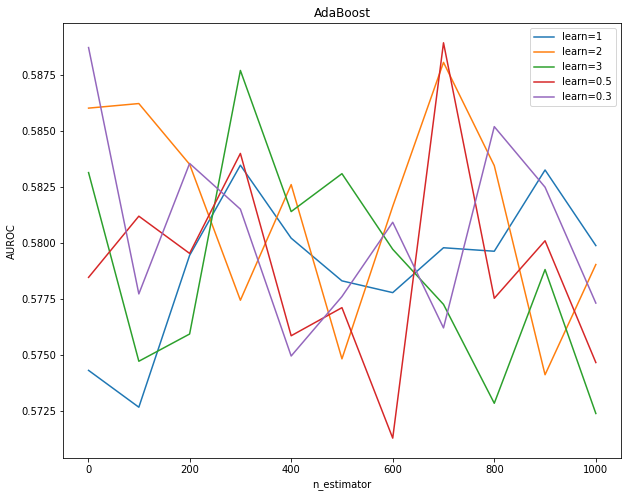

<Figure size 720x576 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(i, auroc)
plt.plot(i, auroc1)
plt.plot(i, auroc4)
plt.plot(i, auroc2)
plt.plot(i, auroc3)
plt.title('AdaBoost')
plt.xlabel("n_estimator")
plt.ylabel("AUROC")
plt.legend(['learn=1','learn=2','learn=3','learn=0.5','learn=0.3'])
plt.rcParams["figure.figsize"] = (10,8)
plt.savefig('ada.png', dpi = 300)
plt.show()
plt.clf()

In [ ]:
print(auroc3)

[0.5887325551062996, 0.5777334862252366, 0.5835588670057823, 0.5815163833456517, 0.5749614147210991, 0.577616643479269, 0.5809330753735344, 0.5762163420430996, 0.585202364389954, 0.5824986775937278, 0.5773249894932104]


In [ ]:
print(auroc2)

[0.5784725845253105, 0.5812048026897382, 0.5795422843934321, 0.5840063113197977, 0.5758658138051969, 0.5771207411271974, 0.5712953603466516, 0.5889463139283799, 0.5775387483152906, 0.580106571453415, 0.5746697607350405]


In [4]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import metrics
estimator = sklearn.tree.DecisionTreeClassifier()
best_model = sklearn.ensemble.AdaBoostClassifier(base_estimator=estimator, n_estimators=700,learning_rate=0.3)
best_model.fit(x_train, y_train)
prediction = best_model.predict(x_test)
#auroc3.append(sklearn.metrics.roc_auc_score(y_test,prediction))
#plot.figure(figsize=(5,5))
#cm=metrics.confusion_matrix(y_test,prediction)
#sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
#plot.ylabel('Actual label');
#plot.xlabel('Predicted label');
#plot.title("AdaBoost")
#plot.rcParams["figure.figsize"] = (5,5)
#plot.savefig('ada.png', dpi = 300)

sklearn.metrics.precision_score(y_test, prediction)


0.7028145695364238